<a href="https://colab.research.google.com/github/doan362687264/NhanDang/blob/main/flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


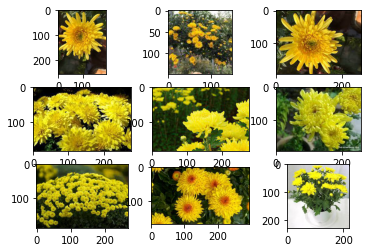

(73, 150, 150, 3) (73,)
Epoch 1/100
2/2 [==============================] - 2s 321ms/step - loss: 166.5998 - accuracy: 0.1507
Epoch 2/100
2/2 [==============================] - 0s 28ms/step - loss: 308.1869 - accuracy: 0.0685
Epoch 3/100
2/2 [==============================] - 0s 29ms/step - loss: 141.7286 - accuracy: 0.1918
Epoch 4/100
2/2 [==============================] - 0s 29ms/step - loss: 49.3645 - accuracy: 0.5068
Epoch 5/100
2/2 [==============================] - 0s 29ms/step - loss: 12.3110 - accuracy: 0.4521
Epoch 6/100
2/2 [==============================] - 0s 31ms/step - loss: 1.7316 - accuracy: 0.7397
Epoch 7/100
2/2 [==============================] - 0s 32ms/step - loss: 1.1600 - accuracy: 0.7671
Epoch 8/100
2/2 [==============================] - 0s 30ms/step - loss: 0.4297 - accuracy: 0.8082
Epoch 9/100
2/2 [==============================] - 0s 38ms/step - loss: 0.1812 - accuracy: 0.9315
Epoch 10/100
2/2 [==============================] - 0s 38ms/step - loss: 0.1299 - acc

In [5]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
folder= '/content/drive/MyDrive/flow/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder + 'hoacuc.'+ str(i) +'.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()
folder = '/content/drive/MyDrive/flow/'

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('hoacuc'):
    output = 0
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('thuocduoc'):
    output = 1
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('hoamattroi'):
    output = 2
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('vantho'):
    output = 3
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)


    
 
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('10foods_photos.npy', photos)
save('10foods_labels.npy', labels)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(150,150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(photos, labels, batch_size=64,epochs=100, verbose=1)
model.save('hoa.h5')


[[0.11825168 0.12193006 0.15468988 0.14056057 0.07479449 0.07002646
  0.09324413 0.08661915 0.05533722 0.0845464 ]]


'hoamattroi'

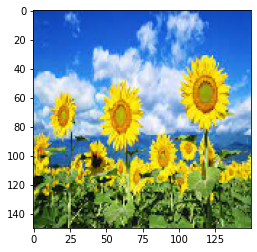

In [6]:
classes = ["hoacuc","thuocduoc","hoamattroi","vantho"]
img = load_img('/content/1.jpg', target_size=(150,150))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,150,150,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]